# Análise da diferença salarial para trabalhadores de TI conforme a escolaridade de cada indivíduo.

Aqui é realizado as análises de quantidade de pessoas e diferença salarial entre homens e mulheres com funções trabalhistas de TI distribuídos em qualquer setor produtivo na cidade de Sorocaba, conforme a escolaridade de cada indivíduo em um recorte de 2012, 2013 e 2014.

## Etapas iniciais para realização das análises:


### Imports necessários para realização dos processamentos e análises:


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

### Variáveis inicias importantes utilizadas durante a realização dos processamentos e análises:

In [8]:
# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Criando indices das raças:
escol = {5: 'Fundamental Completo', 7: 'Médio Completo', 9: 'Superior Completo', 10: 'Mestrado', 11: 'Doutorado'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

### Etapa de leitura dos dados das tabelas em CSV para 2012, 2013 e 2014:


In [10]:
# Leitura da tabela de dados gerais para 2012:
RAIS_GERAL_2012 = pd.read_csv("../data/SP2012.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2012.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [11]:
# Leitura da tabela de dados gerais para 2013:
RAIS_GERAL_2013 = pd.read_csv("../data/SP2013.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2013.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [12]:
# Leitura da tabela de dados gerais para 2014:
RAIS_GERAL_2014 = pd.read_csv("../data/SP2014.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2014.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

### Correção da coluna de escolaridade para utilização correta:


In [14]:
# Retirando dados referentes a indivíduos com escolaridade 1 (Analfabeto):
RAIS_GERAL_2012 = RAIS_GERAL_2012[RAIS_GERAL_2012['Escolaridade'] != 1]
RAIS_GERAL_2013 = RAIS_GERAL_2013[RAIS_GERAL_2013['Escolaridade'] != 1]
RAIS_GERAL_2014 = RAIS_GERAL_2014[RAIS_GERAL_2014['Escolaridade'] != 1]

# Retirando dados referentes a indivíduos com escolaridade 2 (Fundamental Incompleto):
RAIS_GERAL_2012 = RAIS_GERAL_2012[RAIS_GERAL_2012['Escolaridade'] != 2]
RAIS_GERAL_2013 = RAIS_GERAL_2013[RAIS_GERAL_2013['Escolaridade'] != 2]
RAIS_GERAL_2014 = RAIS_GERAL_2014[RAIS_GERAL_2014['Escolaridade'] != 2]

# Retirando dados referentes a indivíduos com escolaridade 3 (Fundamental Incompleto):
RAIS_GERAL_2012 = RAIS_GERAL_2012[RAIS_GERAL_2012['Escolaridade'] != 3]
RAIS_GERAL_2013 = RAIS_GERAL_2013[RAIS_GERAL_2013['Escolaridade'] != 3]
RAIS_GERAL_2014 = RAIS_GERAL_2014[RAIS_GERAL_2014['Escolaridade'] != 3]

# Retirando dados referentes a indivíduos com escolaridade 4 (Fundamental Incompleto):
RAIS_GERAL_2012 = RAIS_GERAL_2012[RAIS_GERAL_2012['Escolaridade'] != 4]
RAIS_GERAL_2013 = RAIS_GERAL_2013[RAIS_GERAL_2013['Escolaridade'] != 4]
RAIS_GERAL_2014 = RAIS_GERAL_2014[RAIS_GERAL_2014['Escolaridade'] != 4]

# Substituindo o status de médio incompleto (6) para fundamental completo:
RAIS_GERAL_2012['Escolaridade'] = RAIS_GERAL_2012['Escolaridade'].replace(6, 5).replace(6, 5)
RAIS_GERAL_2013['Escolaridade'] = RAIS_GERAL_2013['Escolaridade'].replace(6, 5).replace(6, 5)
RAIS_GERAL_2014['Escolaridade'] = RAIS_GERAL_2014['Escolaridade'].replace(6, 5).replace(6, 5)

# Substituindo o status de superior incompleto (6) para médio completo:
RAIS_GERAL_2012['Escolaridade'] = RAIS_GERAL_2012['Escolaridade'].replace(8, 7).replace(8, 7)
RAIS_GERAL_2013['Escolaridade'] = RAIS_GERAL_2013['Escolaridade'].replace(8, 7).replace(8, 7)
RAIS_GERAL_2014['Escolaridade'] = RAIS_GERAL_2014['Escolaridade'].replace(8, 7).replace(8, 7)

### Correção da inflação do período analisado até o atual das remunerações pelo fator de correção INPC (IBGE):

In [16]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2012 (data dos dados para 2012) 
# até 09/2024 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2012 = 1.94801240

RAIS_GERAL_2012["Remuneração"] = RAIS_GERAL_2012["Remuneração"] * fator_correcao_inflacao_2012

# Índice de correção de inflação para o período de 12/2013 (data dos dados para 2013) 
# até 09/2024 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2013 = 1.84499480

RAIS_GERAL_2013["Remuneração"] = RAIS_GERAL_2013["Remuneração"] * fator_correcao_inflacao_2013

# Índice de correção de inflação para o período de 12/2014 (data dos dados para 2014) 
# até 09/2024 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2014 = 1.73509650

RAIS_GERAL_2014["Remuneração"] = RAIS_GERAL_2014["Remuneração"] * fator_correcao_inflacao_2014

### Exibição das tabelas gerais para cada ano:


In [18]:
# Exibindo os cinco primeiros dados da tabela de 2012:
RAIS_GERAL_2012.head()

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,212420,62031,4,5,26,355220,2,"9,467.34",1
1,317110,62015,6,5,41,355220,2,"2,115.54",1
2,317115,62015,5,7,39,355220,9,"2,142.81",1
3,317110,62091,3,7,21,355220,2,"4,234.98",1
4,212420,63119,4,7,26,355220,9,"4,371.34",1


In [19]:
# Exibindo os cinco primeiros dados da tabela de 2013:
RAIS_GERAL_2013.head()

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,142510,62015,4,5,28,355220,9,"7,542.34",1
1,317110,62015,3,7,21,355220,9,"2,770.55",1
2,212420,62040,6,7,45,355220,2,"3,160.29",1
3,212420,62040,6,7,49,355220,2,"16,904.32",1
4,212420,62040,5,7,30,355220,4,"2,844.28",1


In [20]:
# Exibindo os cinco primeiros dados da tabela de 2014:
RAIS_GERAL_2014.head()

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
1,317105,62015,5,5,34,355220,9,"2,236.50",1
2,317105,62015,3,5,20,355220,9,"2,342.38",1
3,317110,62015,4,5,25,355220,9,"2,654.54",1
4,317110,62091,4,7,28,355220,2,"3,520.11",1
5,317210,63119,3,7,21,355220,2,"1,436.61",1


## Análise da frequência (quantidade de pessoas) dos dados entre homens e mulheres distribuídos conforme a escolaridade de cada indivíduo:


### Criação das tabelas para relatório e tabela para formação do gráfico:


In [24]:
# Tabela principal para quantidade em 2012:
RAIS_GERAL_2012_QNT = pd.crosstab(RAIS_GERAL_2012["Escolaridade"], RAIS_GERAL_2012["Sexo"].replace(sexo))
RAIS_GERAL_2012_QNT.insert(1, "% Fem.", RAIS_GERAL_2012_QNT["Fem."] / (RAIS_GERAL_2012_QNT["Fem."] + RAIS_GERAL_2012_QNT["Masc."]) * 100)
RAIS_GERAL_2012_QNT.insert(3, "% Masc.", RAIS_GERAL_2012_QNT["Masc."] / (RAIS_GERAL_2012_QNT["Fem."] + RAIS_GERAL_2012_QNT["Masc."]) * 100)

RAIS_GERAL_2012_QNT.rename(index = escol, inplace = True)


In [29]:
RAIS_GERAL_2012_QNT


Sexo,Fem.,% Fem.,Masc.,% Masc.
Escolaridade,,,,
Fundamental Completo,0,0.00,2,100.00
Médio Completo,26,18.31,116,81.69
Superior Completo,44,23.04,147,76.96
Mestrado,0,0.00,1,100.00


In [33]:
# Tabela principal para quantidade em 2013:
RAIS_GERAL_2013_QNT = pd.crosstab(RAIS_GERAL_2013["Escolaridade"], RAIS_GERAL_2013["Sexo"].replace(sexo))
RAIS_GERAL_2013_QNT.insert(1, "% Fem.", RAIS_GERAL_2013_QNT["Fem."] / (RAIS_GERAL_2013_QNT["Fem."] + RAIS_GERAL_2013_QNT["Masc."]) * 100)
RAIS_GERAL_2013_QNT.insert(3, "% Masc.", RAIS_GERAL_2013_QNT["Masc."] / (RAIS_GERAL_2013_QNT["Fem."] + RAIS_GERAL_2013_QNT["Masc."]) * 100)

RAIS_GERAL_2013_QNT.rename(index = escol, inplace = True)


In [37]:
RAIS_GERAL_2013_QNT


Sexo,Fem.,% Fem.,Masc.,% Masc.
Escolaridade,,,,
Fundamental Completo,0,0.00,1,100.00
Médio Completo,27,16.98,132,83.02
Superior Completo,56,19.72,228,80.28
Mestrado,0,0.00,2,100.00


In [38]:
# Tabela principal para quantidade em 2014:
RAIS_GERAL_2014_QNT = pd.crosstab(RAIS_GERAL_2014["Escolaridade"], RAIS_GERAL_2014["Sexo"].replace(sexo))
RAIS_GERAL_2014_QNT.insert(1, "% Fem.", RAIS_GERAL_2014_QNT["Fem."] / (RAIS_GERAL_2014_QNT["Fem."] + RAIS_GERAL_2014_QNT["Masc."]) * 100)
RAIS_GERAL_2014_QNT.insert(3, "% Masc.", RAIS_GERAL_2014_QNT["Masc."] / (RAIS_GERAL_2014_QNT["Fem."] + RAIS_GERAL_2014_QNT["Masc."]) * 100)

RAIS_GERAL_2014_QNT.rename(index = escol, inplace = True)


In [40]:
RAIS_GERAL_2014_QNT


Sexo,Fem.,% Fem.,Masc.,% Masc.
Escolaridade,,,,
Fundamental Completo,0,0.00,3,100.00
Médio Completo,21,12.88,142,87.12
Superior Completo,71,19.40,295,80.60
Mestrado,0,0.00,2,100.00


In [42]:
# Tabela para gráfico da quantidade em 2012:
RAIS_GERAL_2012_QNT.insert(4, "Total", RAIS_GERAL_2012_QNT["% Masc."] + RAIS_GERAL_2012_QNT["% Fem."])
RAIS_GERAL_2012_QNT.insert(5, "Ano", "2012")

# Tabela para gráfico da quantidade em 2013:
RAIS_GERAL_2013_QNT.insert(4, "Total", RAIS_GERAL_2013_QNT["% Masc."] + RAIS_GERAL_2013_QNT["% Fem."])
RAIS_GERAL_2013_QNT.insert(5, "Ano", "2013")

# Tabela para gráfico da quantidade em 2014:
RAIS_GERAL_2014_QNT.insert(4, "Total", RAIS_GERAL_2014_QNT["% Masc."] + RAIS_GERAL_2014_QNT["% Fem."])
RAIS_GERAL_2014_QNT.insert(5, "Ano", "2014")

# Junção das tabelas anteriores em uma para geração do gráfico:
RAIS_GERAL_QNT_GRAF = pd.concat([RAIS_GERAL_2012_QNT, RAIS_GERAL_2013_QNT, RAIS_GERAL_2014_QNT]).reset_index()

### Criação do gráfico com os dados referentes a quantidade:


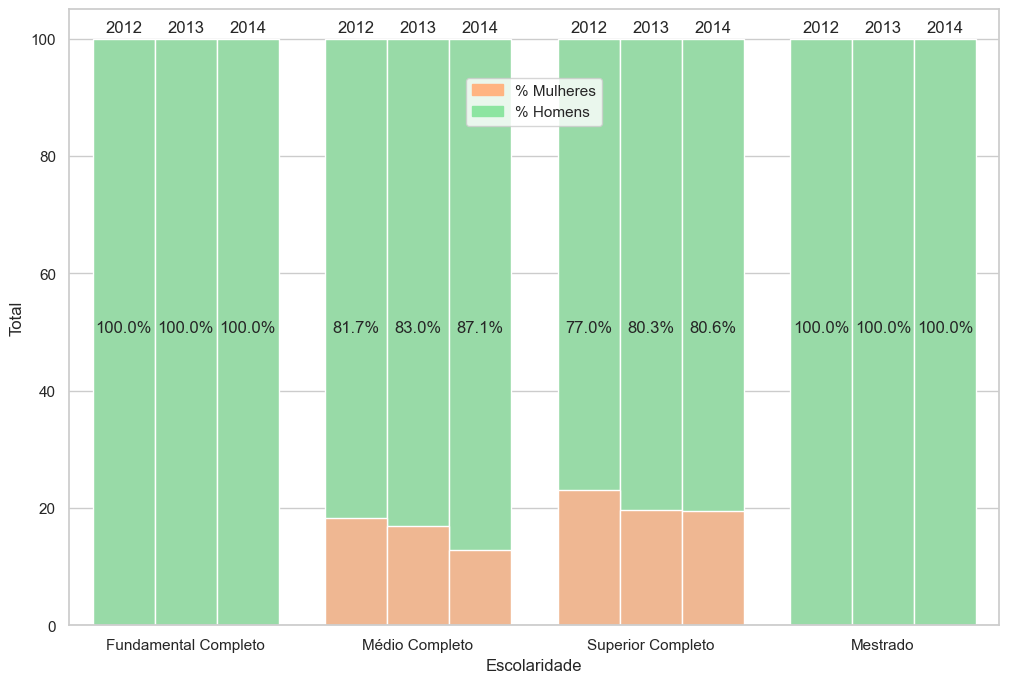

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Montagem inicial da imagem do gráfico:
plt.figure(figsize=(12, 8))

# Configuração da grid da imagem:
sns.set(style="whitegrid")

# Criação da primeira barra, referente ao total de 100% que fica atrás pela próxima barra:
bar1 = sns.barplot(x="Escolaridade", y="Total", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2012": color_masc, "2013": color_masc, "2014": color_masc})

# Captura da quantidade de barras existentes até o momento:
patches = bar1.patches

# Escrita da porcentagem para cada barra existente até o momento (porcentagem dos homens):
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() / 2
    if i < len(RAIS_GERAL_QNT_GRAF):  # Verifica se o índice está dentro dos limites
        bar1.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Masc."].iloc[i]), (x, y), ha='center')

# Escrita do valor do ano para cada barra em dupla:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() + 1
    if i < len(RAIS_GERAL_QNT_GRAF):  # Verifica se o índice está dentro dos limites
        bar1.annotate('{}'.format(RAIS_GERAL_QNT_GRAF["Ano"].iloc[i]), (x, y), ha='center')

# Criação da segunda barra, referente à porcentagem das mulheres:
bar2 = sns.barplot(x="Escolaridade", y="% Fem.", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2012": color_fem, "2013": color_fem, "2014": color_fem})

# Captura das barras recém criadas:
patches_fem = bar2.patches[len(bar1.patches):]  # Considera apenas as novas barras

# Escrita da porcentagem para cada barra capturada das mulheres:
for i in range(len(patches_fem)):
    x = patches_fem[i].get_x() + patches_fem[i].get_width() / 2
    y = patches_fem[i].get_height() / 2
    if i < len(RAIS_GERAL_QNT_GRAF):  # Verifica se o índice está dentro dos limites
        bar2.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Fem."].iloc[i]), (x, y), ha='center')

# Finalização de configurações de exibição do gráfico:
top_bar = mpatches.Patch(label='% Mulheres', color=color_fem)
bottom_bar = mpatches.Patch(label='% Homens', color=color_masc)
plt.legend(handles=[top_bar, bottom_bar], loc='center', bbox_to_anchor=(.45, .8, .1, .1))

# Salvar o gráfico
plt.savefig("./figures/svg/qnt_sexo_escolaridade.svg")
plt.show()


## Análise das médias salariais e diferenças:


### Distribuição da remuneração para cada sexo cruzado pela escolaridade:


In [ ]:
RAIS_GERAL_2012_BOX = RAIS_GERAL_2012.copy()
RAIS_GERAL_2012_BOX["Sexo"].replace(sexo, inplace = True)
RAIS_GERAL_2012_BOX["Escolaridade"].replace(escol, inplace = True)

RAIS_GERAL_2012_BOX

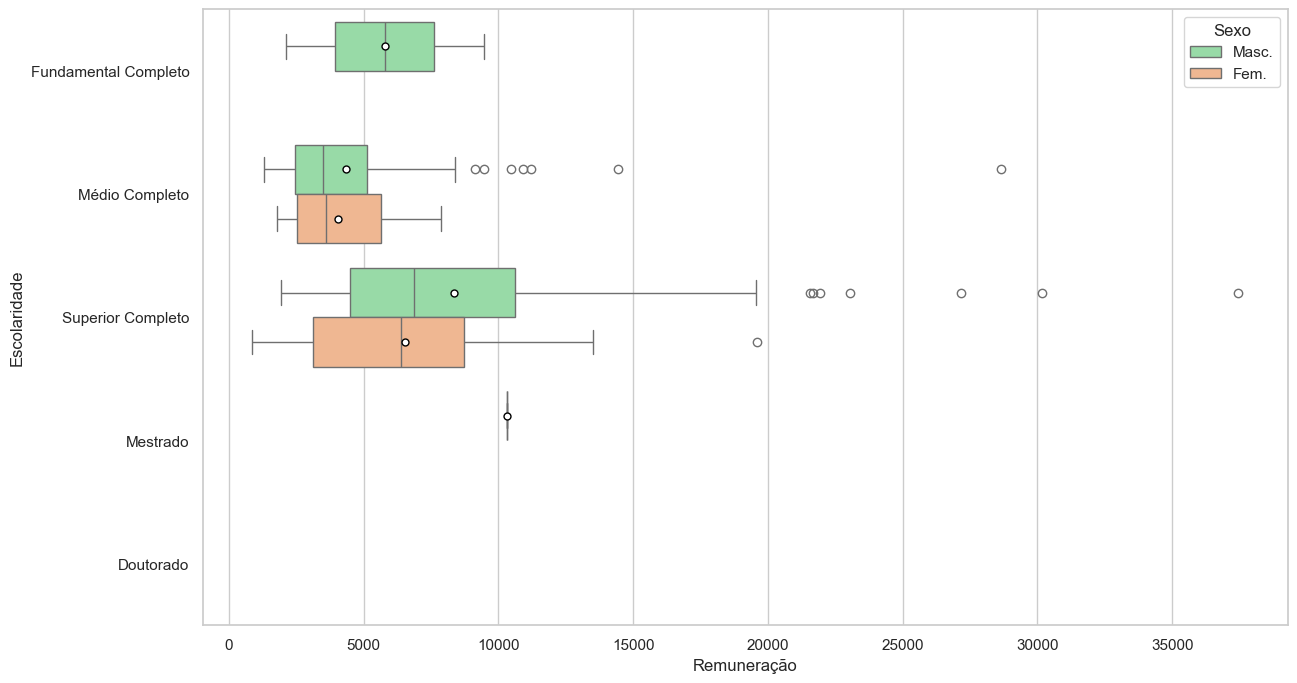

In [98]:
box = sns.boxplot(x = 'Remuneração', y = 'Escolaridade', hue = 'Sexo', data = RAIS_GERAL_2012_BOX, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = escol.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("./figures/png/boxpot_sexo_escolaridade_2012.png", dpi = 300)

In [ ]:
RAIS_GERAL_2013_BOX = RAIS_GERAL_2013.copy()
RAIS_GERAL_2013_BOX["Sexo"].replace(sexo, inplace = True)
RAIS_GERAL_2013_BOX["Escolaridade"].replace(escol, inplace = True)

RAIS_GERAL_2013_BOX

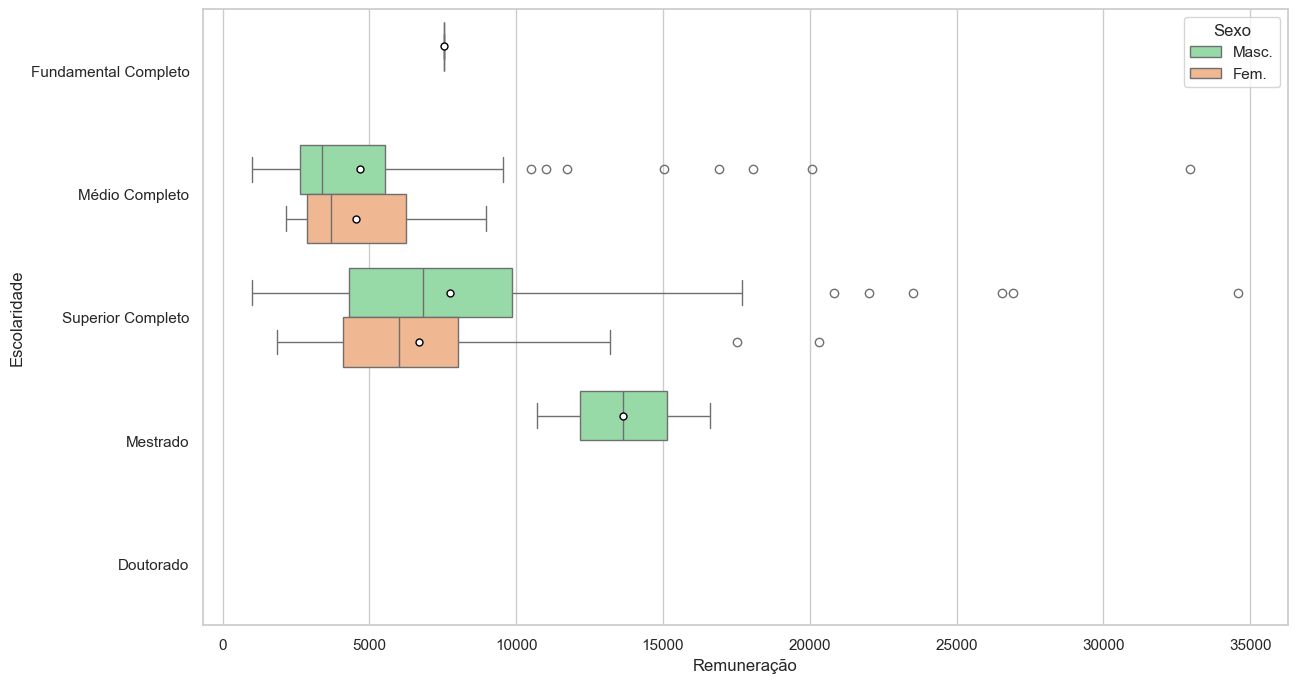

In [102]:
box = sns.boxplot(x = 'Remuneração', y = 'Escolaridade', hue = 'Sexo', data = RAIS_GERAL_2013_BOX, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = escol.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("./figures/png/boxplot_sexo_escolaridade_2013.png", dpi = 300)

In [ ]:
RAIS_GERAL_2014_BOX = RAIS_GERAL_2014.copy()
RAIS_GERAL_2014_BOX["Sexo"].replace(sexo, inplace = True)
RAIS_GERAL_2014_BOX["Escolaridade"].replace(escol, inplace = True)

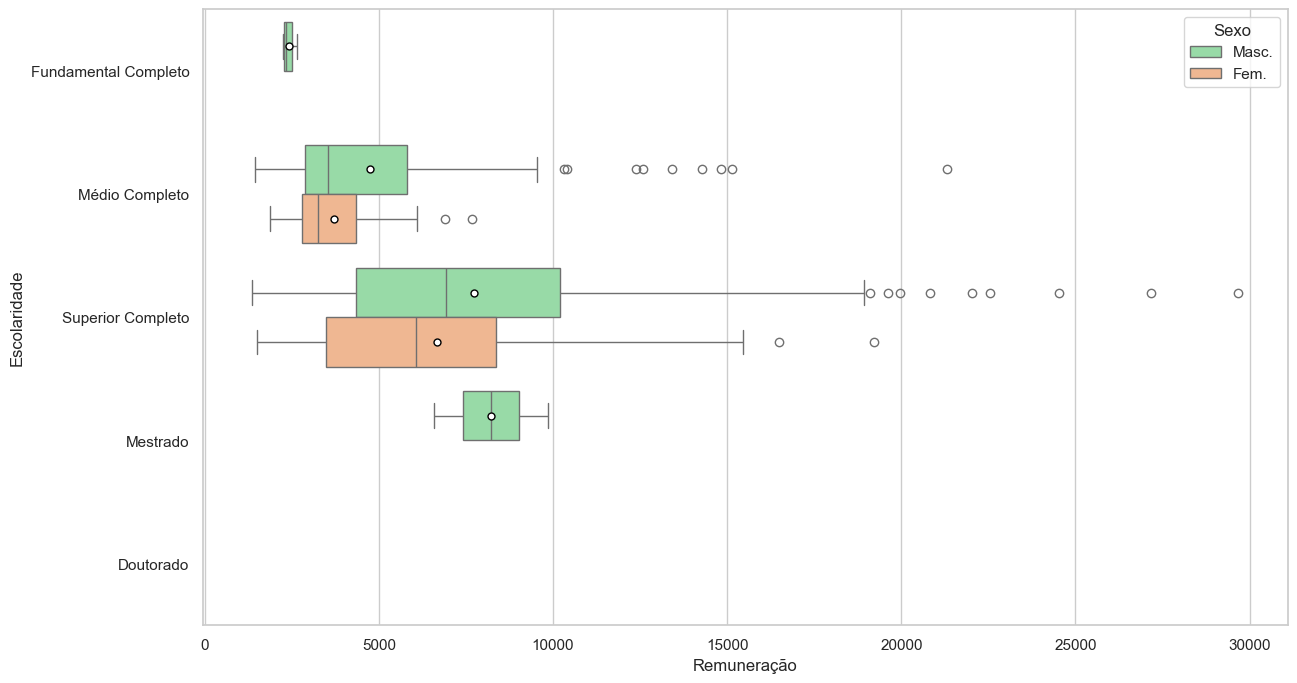

In [104]:
box = sns.boxplot(x = 'Remuneração', y = 'Escolaridade', hue = 'Sexo', data = RAIS_GERAL_2014_BOX, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = escol.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("./figures/png/boxplot_sexo_escolaridade_2014.png", dpi = 300)

### Criação das tabelas com as diferenças salarias e da tabela para geração do gráfico:


In [55]:
# Tabela principal para média e diferença salarial em 2012:
RAIS_GERAL_2012_MEDIA = pd.crosstab(RAIS_GERAL_2012["Escolaridade"], RAIS_GERAL_2012["Sexo"].replace(sexo), values=RAIS_GERAL_2012.Remuneração, aggfunc='mean')
RAIS_GERAL_2012_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2012_MEDIA["Fem."] - RAIS_GERAL_2012_MEDIA["Masc."]) / RAIS_GERAL_2012_MEDIA["Masc."]) * 100)

RAIS_GERAL_2012_MEDIA.rename(index= escol, inplace=True)  
RAIS_GERAL_2012_MEDIA.head()


Sexo,Fem.,Masc.,Diferença Salarial
Escolaridade,,,
Fundamental Completo,NaN,"5,791.44",NaN
Médio Completo,"4,067.46","4,363.28",-6.78
Superior Completo,"6,520.05","8,355.41",-21.97
Mestrado,NaN,"10,335.98",NaN


In [56]:
# Tabela principal para média e diferença salarial em 2013:
RAIS_GERAL_2013_MEDIA = pd.crosstab(RAIS_GERAL_2013["Escolaridade"], RAIS_GERAL_2013["Sexo"].replace(sexo), values=RAIS_GERAL_2013.Remuneração, aggfunc='mean')
RAIS_GERAL_2013_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2013_MEDIA["Fem."] - RAIS_GERAL_2013_MEDIA["Masc."]) / RAIS_GERAL_2013_MEDIA["Masc."]) * 100)

RAIS_GERAL_2013_MEDIA.rename(index= escol, inplace=True)  
RAIS_GERAL_2013_MEDIA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Escolaridade,,,
Fundamental Completo,NaN,"7,542.34",NaN
Médio Completo,"4,551.62","4,689.14",-2.93
Superior Completo,"6,700.92","7,755.64",-13.60
Mestrado,NaN,"13,649.03",NaN


In [57]:
# Tabela principal para média e diferença salarial em 2014:
RAIS_GERAL_2014_MEDIA = pd.crosstab(RAIS_GERAL_2014["Escolaridade"], RAIS_GERAL_2014["Sexo"].replace(sexo), values=RAIS_GERAL_2014.Remuneração, aggfunc='mean')
RAIS_GERAL_2014_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2014_MEDIA["Fem."] - RAIS_GERAL_2014_MEDIA["Masc."]) / RAIS_GERAL_2014_MEDIA["Masc."]) * 100)

RAIS_GERAL_2014_MEDIA.rename(index= escol, inplace=True)  
RAIS_GERAL_2014_MEDIA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Escolaridade,,,
Fundamental Completo,NaN,"2,411.14",NaN
Médio Completo,"3,722.06","4,749.62",-21.63
Superior Completo,"6,663.52","7,726.01",-13.75
Mestrado,NaN,"8,220.88",NaN


In [59]:
RAIS_GERAL_2012_MEDIA.insert(3, "Ano", "2012")

RAIS_GERAL_2013_MEDIA.insert(3, "Ano", "2013")

RAIS_GERAL_2014_MEDIA.insert(3, "Ano", "2014")

RAIS_GERAL_MEDIA_GRAF = pd.concat([RAIS_GERAL_2012_MEDIA, RAIS_GERAL_2013_MEDIA, RAIS_GERAL_2014_MEDIA]).reset_index()

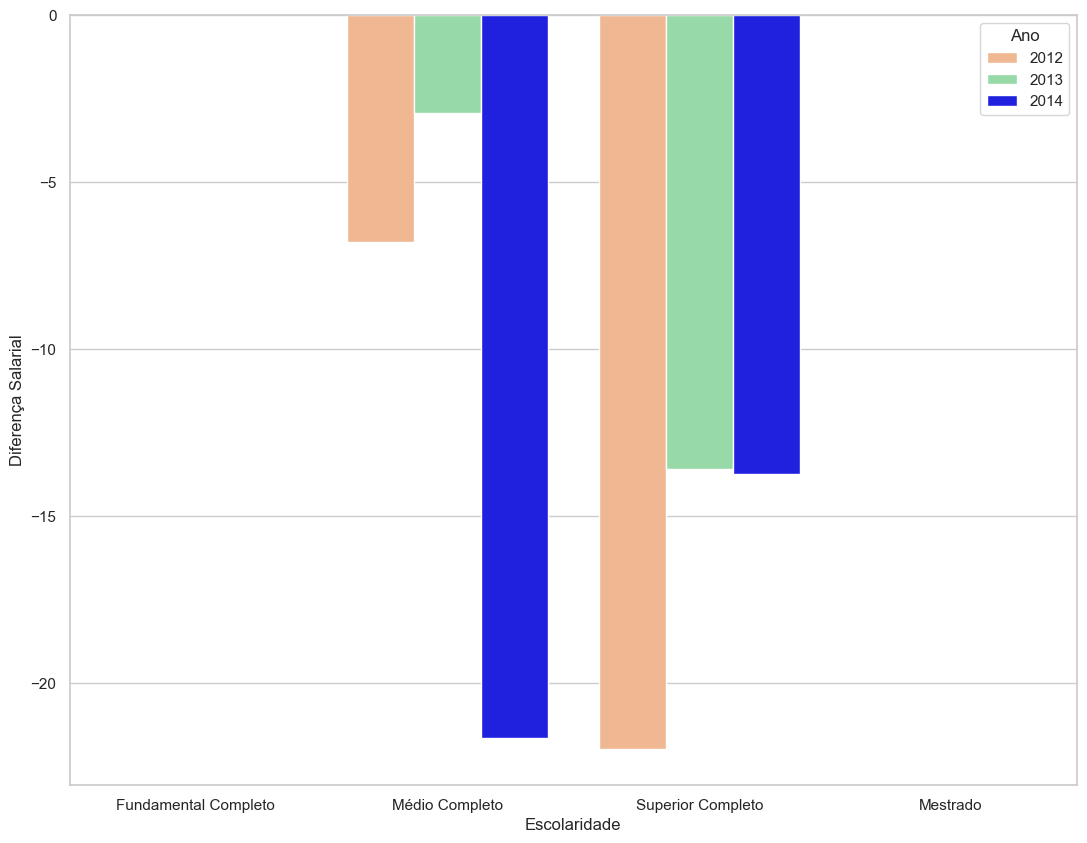

In [65]:
# Criação do gráfico inicial:
plt.figure(figsize=(13, 10))

# Configuração do grid do gráfico:
sns.set(style="whitegrid")

# Criação da barra referente às diferenças salariais:
bar = sns.barplot(x="Escolaridade", y="Diferença Salarial", hue="Ano", data=RAIS_GERAL_MEDIA_GRAF, palette={"2012": color_fem, "2013": color_masc, "2014": "blue"})

# Salvar o gráfico
plt.savefig("./figures/svg/dif_salarial_sexo_escolaridade_media.svg")
plt.show()


In [110]:
# Tabela principal para mediana e diferença salarial em 2012:
RAIS_GERAL_2012_MEDIANA = pd.crosstab(RAIS_GERAL_2012["Escolaridade"], RAIS_GERAL_2012["Sexo"].replace(sexo), values=RAIS_GERAL_2012.Remuneração, aggfunc='median')
RAIS_GERAL_2012_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2012_MEDIANA["Fem."] - RAIS_GERAL_2012_MEDIANA["Masc."]) / RAIS_GERAL_2012_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2012_MEDIANA.rename(index = escol, inplace = True)
RAIS_GERAL_2012_MEDIANA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Escolaridade,,,
Fundamental Completo,NaN,"5,791.44",NaN
Médio Completo,"3,590.92","3,506.42",2.41
Superior Completo,"6,370.60","6,887.35",-7.50
Mestrado,NaN,"10,335.98",NaN


In [112]:
# Tabela principal para mediana e diferença salarial em 2013:
RAIS_GERAL_2013_MEDIANA = pd.crosstab(RAIS_GERAL_2013["Escolaridade"], RAIS_GERAL_2013["Sexo"].replace(sexo), values=RAIS_GERAL_2013.Remuneração, aggfunc='median')
RAIS_GERAL_2013_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2013_MEDIANA["Fem."] - RAIS_GERAL_2013_MEDIANA["Masc."]) / RAIS_GERAL_2013_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2013_MEDIANA.rename(index = escol, inplace = True)
RAIS_GERAL_2013_MEDIANA.head()


Sexo,Fem.,Masc.,Diferença Salarial
Escolaridade,,,
Fundamental Completo,NaN,"7,542.34",NaN
Médio Completo,"3,689.99","3,385.57",8.99
Superior Completo,"6,015.67","6,826.48",-11.88
Mestrado,NaN,"13,649.03",NaN


In [114]:
# Tabela principal para mediana e diferença salarial em 2014:
RAIS_GERAL_2014_MEDIANA = pd.crosstab(RAIS_GERAL_2014["Escolaridade"], RAIS_GERAL_2014["Sexo"].replace(sexo), values=RAIS_GERAL_2014.Remuneração, aggfunc='median')
RAIS_GERAL_2014_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2014_MEDIANA["Fem."] - RAIS_GERAL_2014_MEDIANA["Masc."]) / RAIS_GERAL_2014_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2014_MEDIANA.rename(index = escol, inplace = True)
RAIS_GERAL_2014_MEDIANA.head()


Sexo,Fem.,Masc.,Diferença Salarial
Escolaridade,,,
Fundamental Completo,NaN,"2,342.38",NaN
Médio Completo,"3,264.15","3,532.17",-7.59
Superior Completo,"6,059.41","6,917.67",-12.41
Mestrado,NaN,"8,220.88",NaN


In [116]:
RAIS_GERAL_2012_MEDIANA.insert(3, "Ano", "2012")

RAIS_GERAL_2013_MEDIANA.insert(3, "Ano", "2013")

RAIS_GERAL_2014_MEDIANA.insert(3, "Ano", "2014")

RAIS_GERAL_MEDIANA_GRAF = pd.concat([RAIS_GERAL_2012_MEDIANA, RAIS_GERAL_2013_MEDIANA, RAIS_GERAL_2014_MEDIANA]).reset_index()

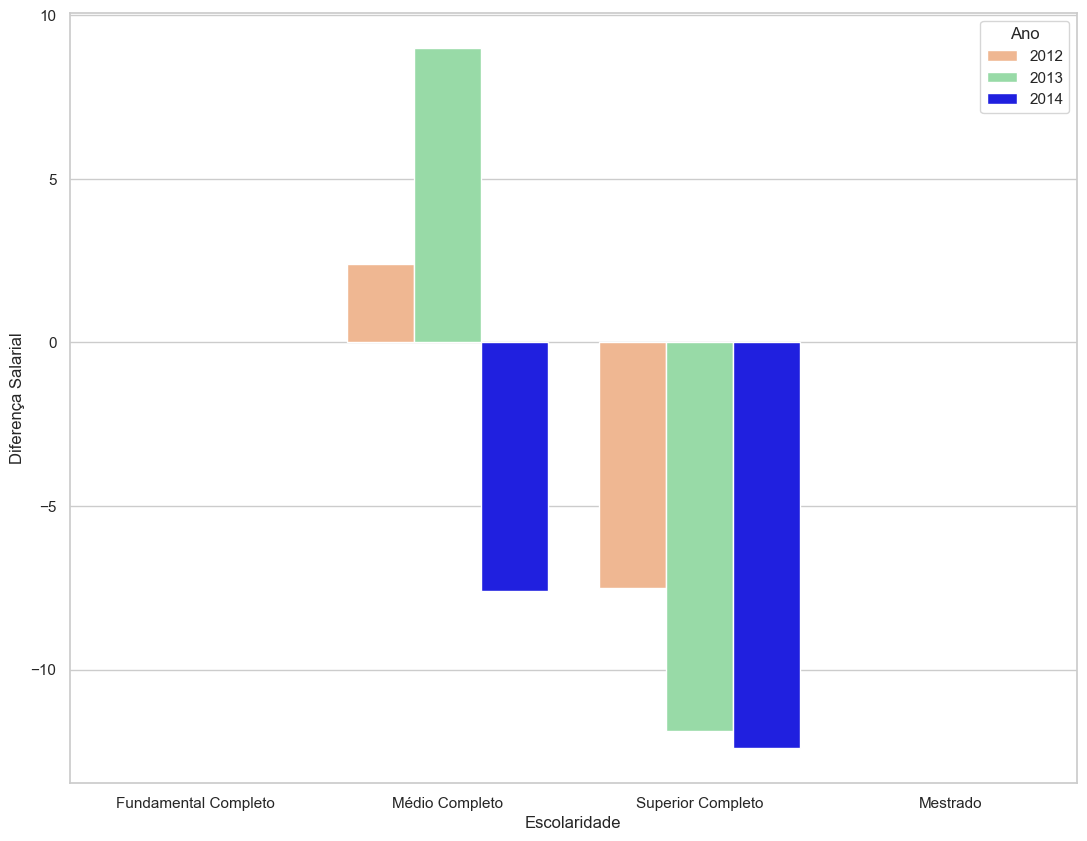

In [120]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Escolaridade", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIANA_GRAF, palette = {"2012": color_fem,"2013": color_masc,"2014": "blue"})

# Captura da quantidade de barras existentes:
patches = bar.patches

plt.savefig("./figures/svg/dif_salarial_sexo_escolaridade_mediana.svg")

### Teste de hipótese para cada grupo de médias por CBOs:


In [123]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Medianas estatisticamente diferentes'
    else:
        return stat, p_valor, 'Medianas estatisticamente iguais'

In [127]:
TESTE_HIP_2012 = pd.DataFrame(columns=['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for e in escol:
    df1 = RAIS_GERAL_2012.query("Sexo == 1").replace(escol).query("Escolaridade == '{}'".format(escol[e])).Remuneração
    df2 = RAIS_GERAL_2012.query("Sexo == 2").replace(escol).query("Escolaridade == '{}'".format(escol[e])).Remuneração

    # Verificação se df1 e df2 não estão vazios
    if df1.empty or df2.empty:
        TESTE_HIP_2012.loc[escol[e]] = [None, None, 'Uma das amostras está vazia']
        continue

    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result = teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2012.loc[escol[e]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2012_HIP = pd.merge(RAIS_GERAL_2012_MEDIANA, TESTE_HIP_2012, left_index=True, right_index=True)
RAIS_GERAL_2012_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2012_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2012_HIP.head()


,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Fundamental Completo,NaN,"5,791.44",None,None,Uma das amostras está vazia
Médio Completo,"3,590.92","3,506.42",1483.5,0.01 > 0.44963...,Medianas estatisticamente iguais
Superior Completo,"6,370.60","6,887.35",2695.5,0.01 > 0.04722...,Medianas estatisticamente iguais
Mestrado,NaN,"10,335.98",None,None,Uma das amostras está vazia


In [129]:
TESTE_HIP_2013 = pd.DataFrame(columns=['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for e in escol:
    df1 = RAIS_GERAL_2013.query("Sexo == 1").replace(escol).query("Escolaridade == '{}'".format(escol[e])).Remuneração
    df2 = RAIS_GERAL_2013.query("Sexo == 2").replace(escol).query("Escolaridade == '{}'".format(escol[e])).Remuneração

    # Verificação se df1 e df2 não estão vazios
    if df1.empty or df2.empty:
        TESTE_HIP_2013.loc[escol[e]] = [None, None, 'Uma das amostras está vazia']
        continue

    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result = teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2013.loc[escol[e]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2013_HIP = pd.merge(RAIS_GERAL_2013_MEDIANA, TESTE_HIP_2013, left_index=True, right_index=True)
RAIS_GERAL_2013_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2013_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2013_HIP.head()


,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Fundamental Completo,NaN,"7,542.34",None,None,Uma das amostras está vazia
Médio Completo,"3,689.99","3,385.57",1593.5,0.01 > 0.19416...,Medianas estatisticamente iguais
Superior Completo,"6,015.67","6,826.48",5602.0,0.01 > 0.07792...,Medianas estatisticamente iguais
Mestrado,NaN,"13,649.03",None,None,Uma das amostras está vazia


In [131]:
TESTE_HIP_2014 = pd.DataFrame(columns=['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for e in escol:
    df1 = RAIS_GERAL_2014.query("Sexo == 1").replace(escol).query("Escolaridade == '{}'".format(escol[e])).Remuneração
    df2 = RAIS_GERAL_2014.query("Sexo == 2").replace(escol).query("Escolaridade == '{}'".format(escol[e])).Remuneração

    # Verificação se df1 e df2 não estão vazios
    if df1.empty or df2.empty:
        TESTE_HIP_2014.loc[escol[e]] = [None, None, 'Uma das amostras está vazia']
        continue

    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result = teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2014.loc[escol[e]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2014_HIP = pd.merge(RAIS_GERAL_2014_MEDIANA, TESTE_HIP_2014, left_index=True, right_index=True)
RAIS_GERAL_2014_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2014_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2014_HIP.head()


,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Fundamental Completo,NaN,"2,342.38",None,None,Uma das amostras está vazia
Médio Completo,"3,264.15","3,532.17",1213.5,0.01 > 0.08498...,Medianas estatisticamente iguais
Superior Completo,"6,059.41","6,917.67",8912.5,0.01 > 0.02567...,Medianas estatisticamente iguais
Mestrado,NaN,"8,220.88",None,None,Uma das amostras está vazia
